# Exercise 5

In [32]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, expon

In [96]:
def plot_bar_with_error(means, variances):
    errors = np.sqrt(variances)
    
    x = np.arange(1, len(means) + 1)

    plt.bar(x, means, yerr=errors, capsize=5, alpha=0.7)
    plt.ylabel("Mean value")
    plt.gca().axhline(np.exp(1) - 1, linestyle="--", alpha=0.7, color="g", label="True value")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend()
    plt.show()

## 5.1 Crude method

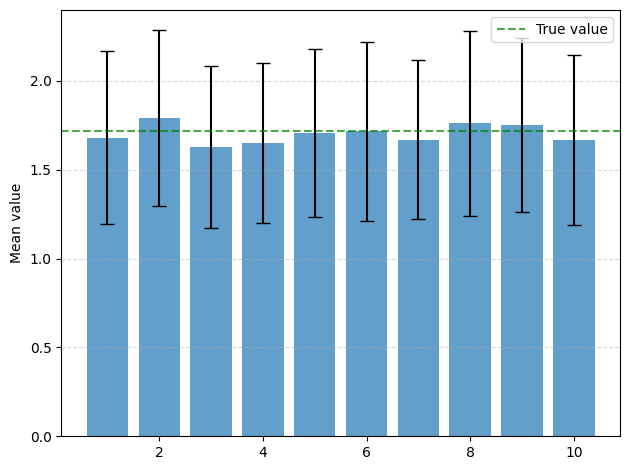

In [97]:
# 5.1
samples = uniform.rvs(size=(10, 100))

xs = np.exp(samples)

means = np.mean(xs, axis=1)
vars = np.var(xs, axis=1)

plot_bar_with_error(means, vars)

## 5.2 Antithetic variables

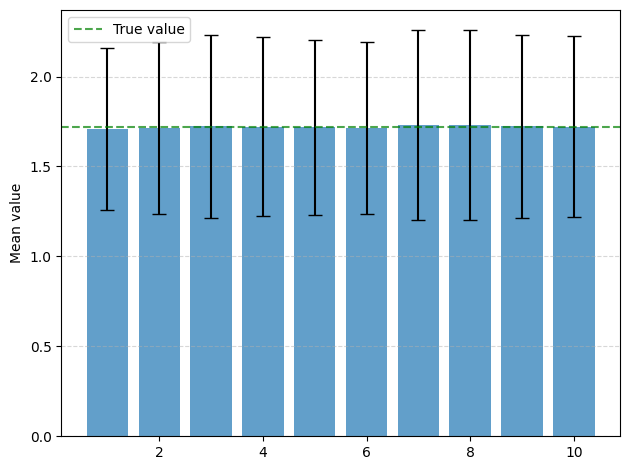

In [99]:
# 5.2
samples = uniform.rvs(size=(10, 50))
samples = np.hstack([samples, 1 - samples])

xs = np.exp(samples)

means = np.mean(xs, axis=1)
vars = np.var(xs, axis=1)

plot_bar_with_error(means, vars)

## 5.3 Control variates

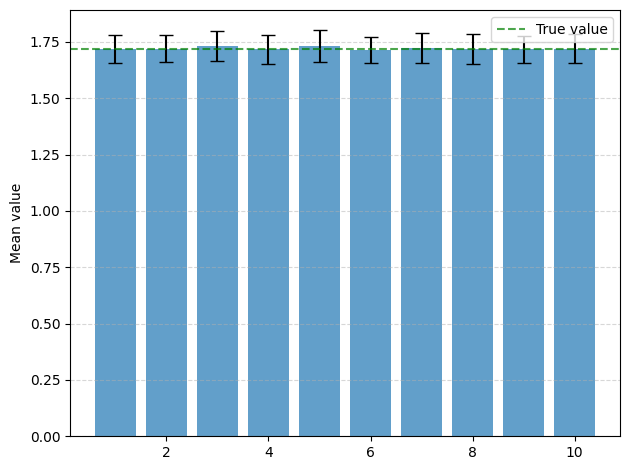

In [100]:
# 5.3
us = uniform.rvs(size=(10, 100))

xs = np.exp(us)

c = -0.14086 * 12 # optimal value from slides

zs = xs + c * (us - 0.5)

means = np.mean(zs, axis=1)
vars = np.var(zs, axis=1)

plot_bar_with_error(means, vars)

## 5.4 Stratified sampling

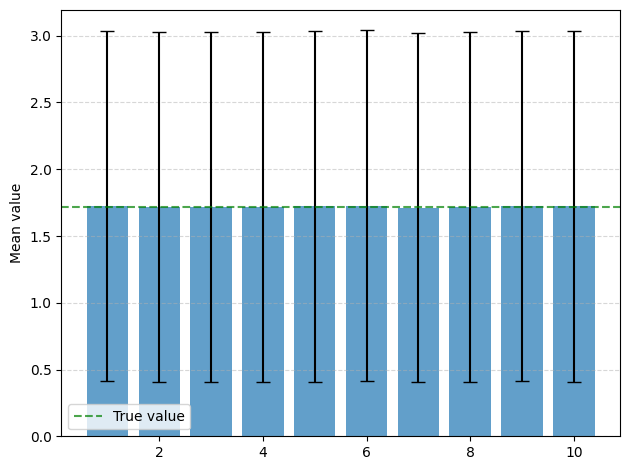

In [101]:
us = uniform.rvs(size=(10, 10, 10))

us_stratified = (np.arange(10).reshape(1, -1, 1) + us) / 10

ws = np.mean(np.exp(us_stratified), axis=1)

means = np.mean(ws, axis=1)
vars = np.mean(ws, axis=1)

plot_bar_with_error(means, vars)

## 5.5 Control variates in queueing system

## 5.6 Common random numbers in queueing system

## 5.7 Importance sampling w/ standard normal

In [ ]:
for a in [2, 4]:
    print(f"a = {a}")
    print(f"Analytical solution: {1 - norm.cdf(a):.6f}")
    for n in [10, 100, 1000, 10_000]:
        print(f"N = {n}")
        zs = norm.rvs(size=n)
        
        crude = np.mean(zs > a)

        ys = norm.rvs(size=n, loc=a, scale=1)

        imp_sampl = np.mean((ys > a) * norm.pdf(ys) / norm.pdf(ys, loc=a, scale=1))

        print(f"Crude estimate:      {crude:.6f}")
        print(f"Importance sampling: {imp_sampl:.6f}")

a = 2
Analytical solution: 0.022750
N = 10
Crude estimate:      0.000000
Importance sampling: 0.026033
N = 100
Crude estimate:      0.020000
Importance sampling: 0.023132
N = 1000
Crude estimate:      0.014000
Importance sampling: 0.022551
N = 10000
Crude estimate:      0.023000
Importance sampling: 0.022331
a = 4
Analytical solution: 0.000032
N = 10
Crude estimate:      0.000000
Importance sampling: 0.000028
N = 100
Crude estimate:      0.000000
Importance sampling: 0.000034
N = 1000
Crude estimate:      0.000000
Importance sampling: 0.000032
N = 10000
Crude estimate:      0.000000
Importance sampling: 0.000031


## 5.8 Importance sampling w/ exponential distribution

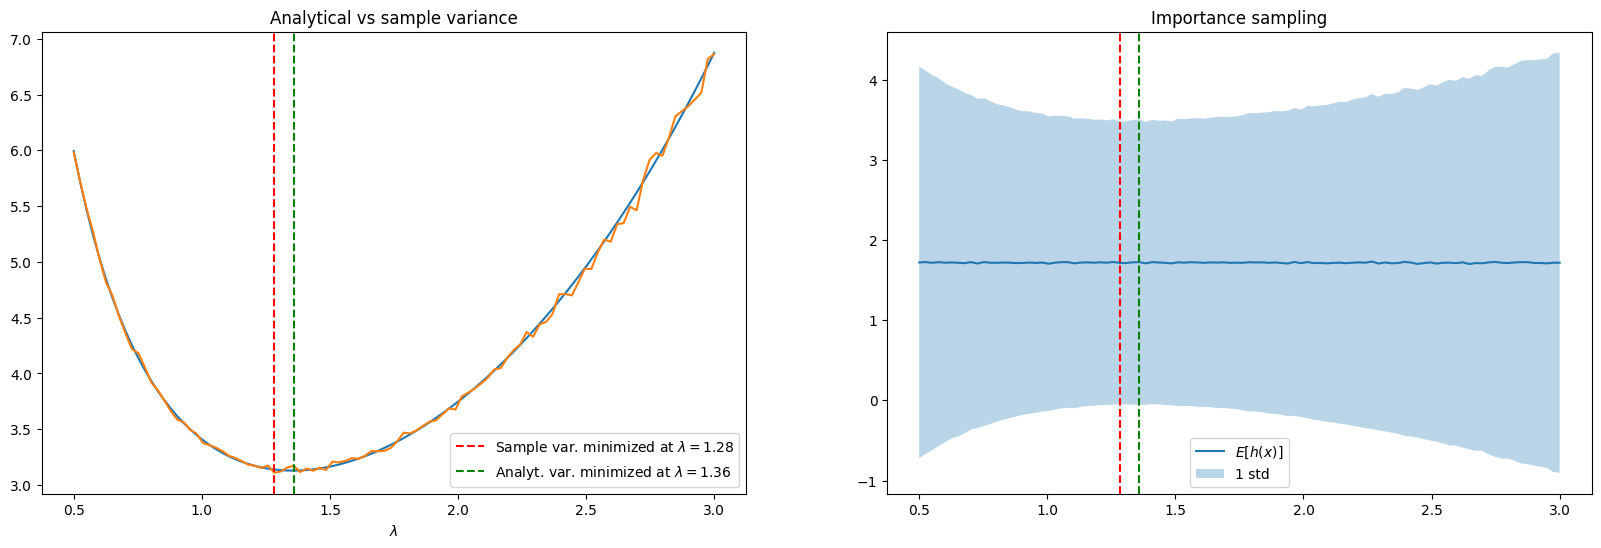

In [ ]:
n = 100
vars = np.empty(n)
means = np.empty(n)
lambdas = np.linspace(0.5, 3.0, n)

def analytical_variance(xs):
    squared_variance = (np.exp(1) - 1) ** 2
    variance_of_square = 1/xs * 1/(2 + xs) * (np.exp(2 + xs) - 1)
    return variance_of_square - squared_variance


for i, gamma in enumerate(lambdas):
    g = expon(scale=1/gamma)
    gs = g.rvs(size=100_000)

    # remember to include the uniform pdf, since the exponential
    # has support outside [0, 1)
    samples = np.exp(gs) * uniform.pdf(gs) / g.pdf(gs)

    means[i] = np.mean(samples)
    vars[i] = np.var(samples)

min_idx = np.argmin(vars)

stds = np.sqrt(vars)

analyt_vars = analytical_variance(lambdas)
analyt_min_idx = np.argmin(analyt_vars)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.set_title("Analytical vs sample variance")
ax1.plot(lambdas, analyt_vars)
ax1.plot(lambdas, vars)
ax1.set_xlabel(r"$\lambda$")
ax1.axvline(lambdas[min_idx], linestyle="--", color="r", label=f"Sample var. minimized at $\\lambda = {lambdas[min_idx]:.2f}$")
ax1.axvline(lambdas[analyt_min_idx], linestyle="--", color="g", label=f"Analyt. var. minimized at $\\lambda = {lambdas[analyt_min_idx]:.2f}$")
ax1.legend()

ax2.plot(lambdas, means, label=r"$E[h(x)]$")
ax2.fill_between(lambdas, means - stds, means + stds, alpha=0.3, label='1 std')
ax2.axvline(lambdas[min_idx], linestyle="--", color="r")
ax2.axvline(lambdas[analyt_min_idx], linestyle="--", color="g")
ax2.set_title("Importance sampling")
ax2.legend()
plt.show()

## 5.9 Pareto importance sampling

What pareto case???